# <u>Part 2:</u> Data visualization

<b><u>Authors</u> :</b> Eytan Levy, Guillaume Surleau et Manitas Bahri  
<b><u>Date</u> :</b> March 2023

In [1]:
# Librairies import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Define the path to the parent directory
import sys
sys.path.append("../")

# Import the custom functions
from py_scripts.PreProcessing import PreProcessing
from py_scripts.Utils import Utils


In [2]:
# To display all the columns and rows of the dataframe in the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
# Load the dataset preprocessed
pp = PreProcessing()
DATASET, _, _ = pp.load_preproc_dataset(ratio_test=0, rescaled=False)


## I. Study of demographic data

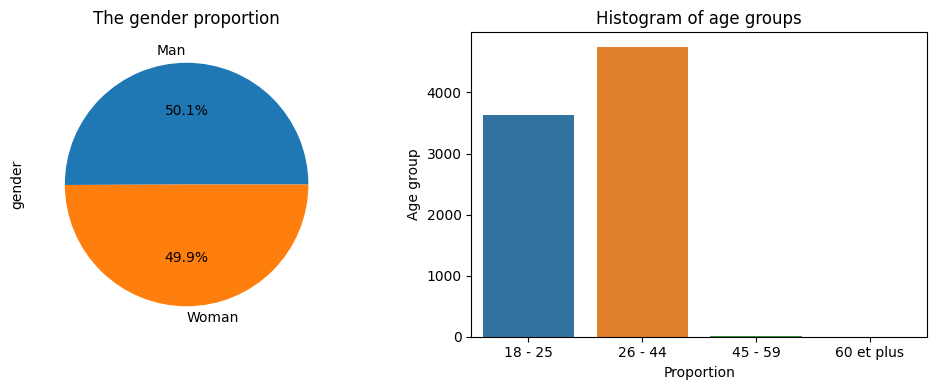

In [4]:
plt.figure(figsize=(10, 4))
args = {"kind": "pie", "autopct": "%.1f%%"}

# Visualization of gender proportions.
plt.subplot(121)
plt.title("The gender proportion")
lbl_gender = ["Man", "Woman"]
DATASET["gender"].value_counts().plot(**args, labels=lbl_gender)

# Visualization of age proportions.
g1 = DATASET[(DATASET["age"] >= 18) & (DATASET["age"] <= 25)]
g2 = DATASET[(DATASET["age"] >= 26) & (DATASET["age"] <= 44)]
g3 = DATASET[(DATASET["age"] >= 45) & (DATASET["age"] <= 59)]
g4 = DATASET[(DATASET["age"] >= 60)]

groups_age = {"18 - 25": len(g1), "26 - 44": len(g2),
              "45 - 59": len(g3), "60 et plus": len(g4)}

plt.subplot(122)
sns.barplot(x=list(groups_age.keys()), y=list(groups_age.values()))
plt.xlabel("Proportion")
plt.ylabel("Age group")
plt.title("Histogram of age groups")

plt.tight_layout()
plt.show()


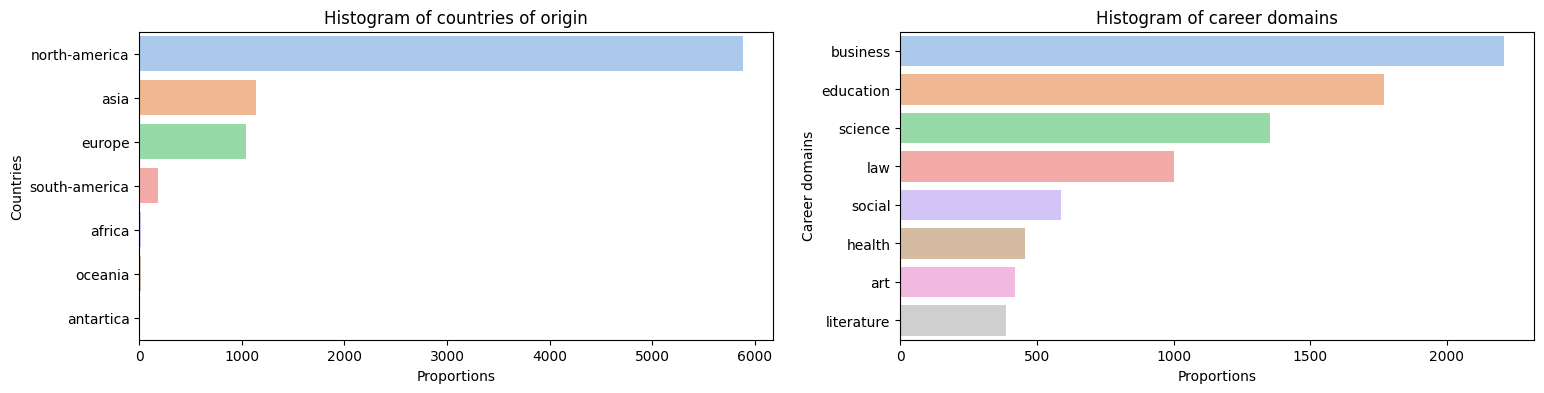

In [5]:
lbl_from, val_from = Utils.count_multiple_columns(DATASET, "from_")
lbl_career, val_career = Utils.count_multiple_columns(DATASET, "career_")

plt.figure(figsize=(18, 4))

# Visualization of the countries of origin
plt.subplot(121)
sns.barplot(x=lbl_from, y=val_from, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Countries")
plt.title("Histogram of countries of origin")

# Visualization of the career domains
plt.subplot(122)
sns.barplot(x=lbl_career, y=val_career, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Career domains")
plt.title("Histogram of career domains")
plt.show()


## II. Study of the match distribution
- We can visualize an imbalanced dataset
- An imbalanced dataset leads to imbalanced visualizations

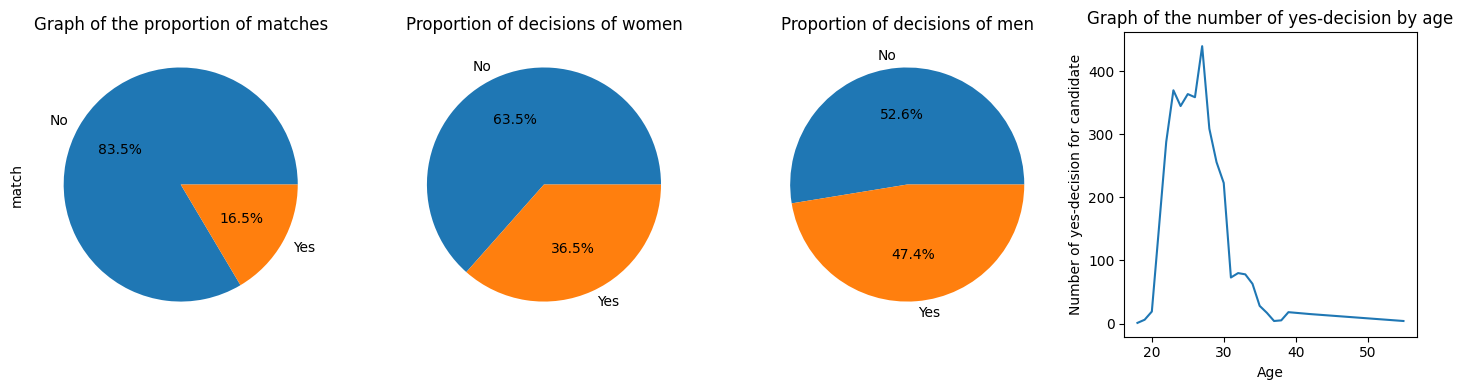

In [6]:
decision = DATASET.groupby("gender")["decision"].value_counts()
woman_decision, man_decision = decision[0], decision[1]
lbl_yesno = ["No", "Yes"]

plt.figure(figsize=(18, 4))

# Proportion de match
plt.subplot(1, 5, 1)
plt.title("Graph of the proportion of matches")
DATASET["match"].value_counts().plot(**args, labels=lbl_yesno)

plt.subplot(1, 5, 2)
plt.pie(x=woman_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion of decisions of women")

plt.subplot(1, 5, 3)
plt.pie(x=man_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion of decisions of men")

plt.subplot(1, 5, 4)
data = DATASET.groupby('age')['decision'].sum()
plt.plot(data.index, data.values)
plt.title("Graph of the number of yes-decision by age")
plt.ylabel("Number of yes-decision for candidate")
plt.xlabel("Age")

plt.tight_layout()
plt.show()


### A. Visualize relationships between categorical features

NameError: name 'samples' is not defined

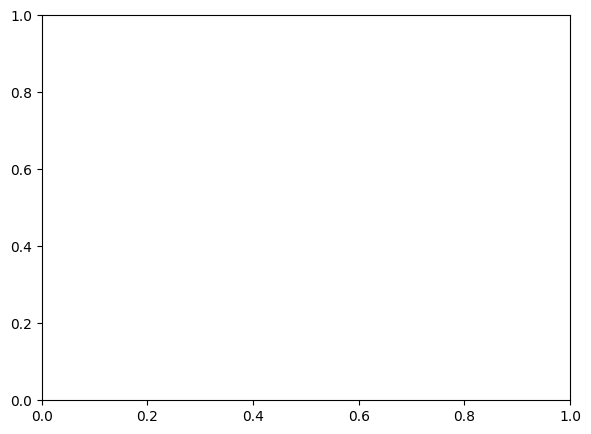

In [7]:
# Under-sampling of the dataset for a better visualization due to the imbalance
DATASET_SAMPLES = pp.get_samples_of_dataframe(DATASET, n_sample=1000)

# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=samples, x="age", y="p_age",hue='match', fill=True, ax=ax1)
plt.title("Observation des matchs en fonction de l'âge des deux personnes")

# Figure 2
plt.subplot(1, 2, 2)
sns.kdeplot(data=samples, x="frequency_go_out", y="p_rate_fun",hue='match',fill=True, ax=ax2)
plt.title("Note de fun en fonction de la fréquence de sortie")

plt.show()

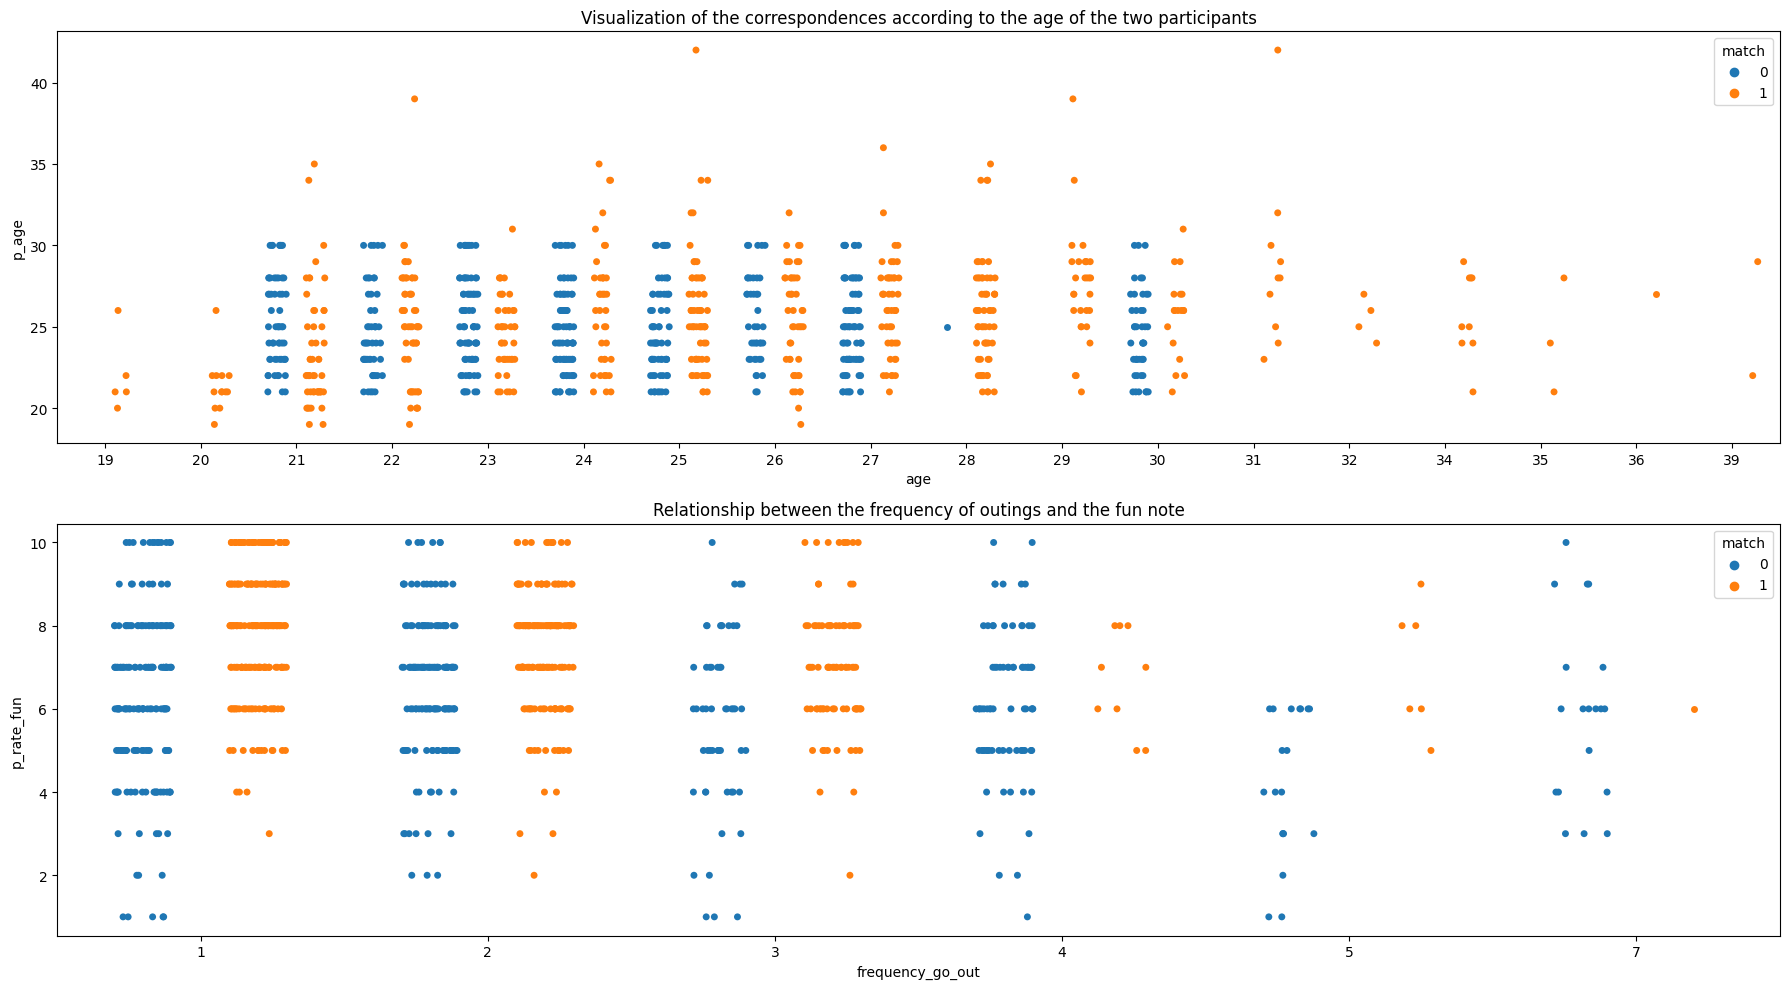

In [ ]:
# Under-sampling of the dataset for a better visualization due to the imbalance
samples = pp.get_samples_of_dataframe(DATASET, n_sample=500)

plt.figure(figsize=(18, 10))

# Plot the correspondences according to the age of the two participants
plt.subplot(2, 1, 1)
sns.stripplot(data=samples, x="age", y="p_age", hue='match', jitter=.2, dodge=True)
plt.title("Visualization of the correspondences according to the age of the two participants")

# Plot the relationship between the frequency of outings and the fun note
plt.subplot(2, 1, 2)
sns.stripplot(data=samples, x="frequency_go_out",
              y="p_rate_fun", hue='match', jitter=.2, dodge=True)
plt.title("Relationship between the frequency of outings and the fun note")

plt.tight_layout()
plt.show()


### B. Visualize `matches` according to the like score

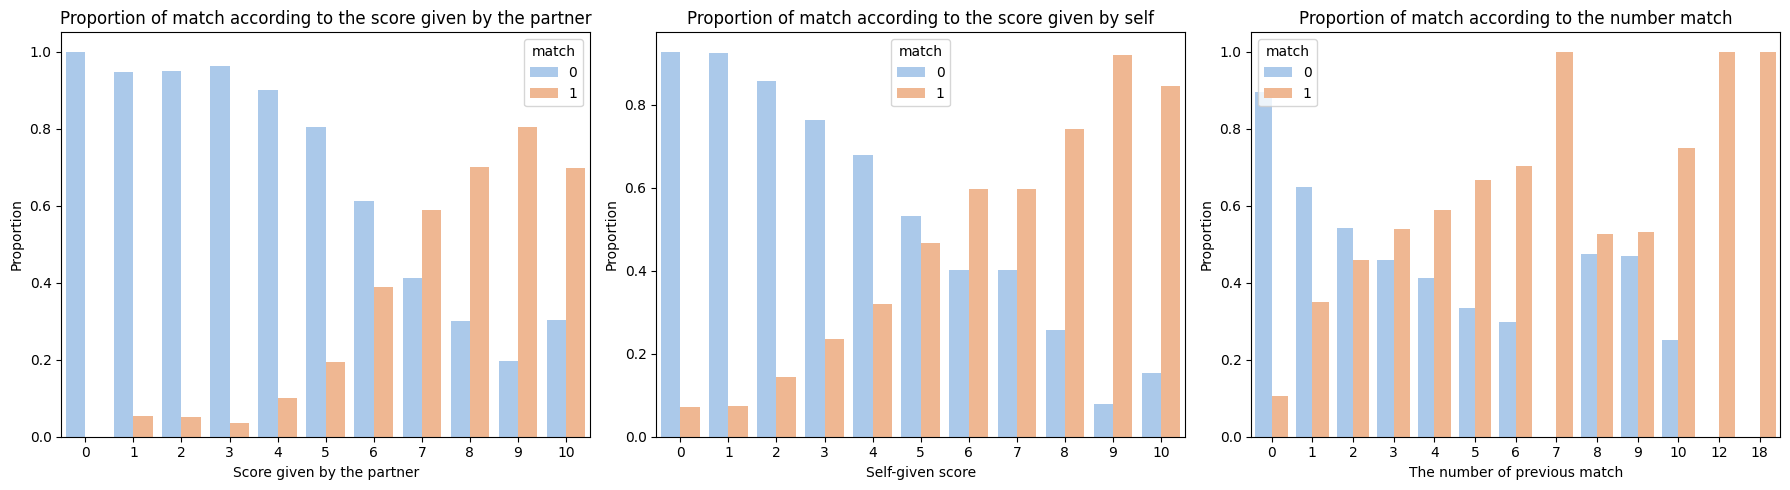

In [ ]:
plt.figure(figsize=(18, 5))

# Visualization of the proportions of the match according to the score given by the partner
data = Utils.count_match_proportions(DATASET_SAMPLES, "p_rate_like")

plt.subplot(1, 3, 1)
sns.barplot(data=data, x="p_rate_like", y="proportion", hue="match", palette="pastel")
plt.xlabel("Score given by the partner")
plt.ylabel("Proportion")
plt.title("Proportion of match according to the score given by the partner")

# Visualizations of the proportions of match according to the score given by self
data = Utils.count_match_proportions(DATASET_SAMPLES, "rate_prob_like")

plt.subplot(1, 3, 2)
sns.barplot(data=data, x="rate_prob_like", y="proportion", hue="match", palette="pastel")
plt.xlabel("Self-given score")
plt.ylabel("Proportion")
plt.title("Proportion of match according to the score given by self")

# Visualizations of the proportions of match according to the score given by self
data = Utils.count_match_proportions(DATASET_SAMPLES, "number_match")

plt.subplot(1, 3, 3)
sns.barplot(data=data, x="number_match", y="proportion", hue="match", palette="pastel")
plt.xlabel("The number of previous match")
plt.ylabel("Proportion")
plt.title("Proportion of match according to the number match")

plt.tight_layout()
plt.show()

### C. Visualize `matches` according demographic information

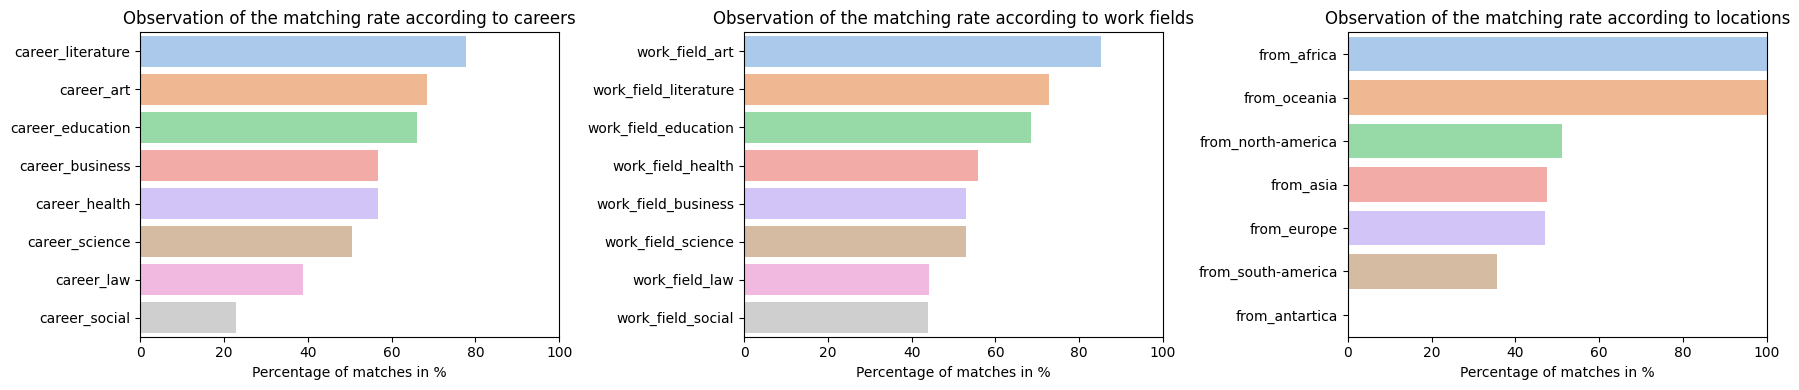

In [ ]:
plt.figure(figsize=(18, 4))

# Visualization of the matching rate according to careers
ratios = Utils.count_ratio_match_features(DATASET_SAMPLES, "career_")

plt.subplot(1, 3, 1)
sns.barplot(x=list(ratios.values()), y=list(ratios.keys()), palette="pastel")
plt.title("Observation of the matching rate according to careers")
plt.xlabel("Percentage of matches in %")
plt.xlim(0, 100)


# Visualization of the matching rate according to work_field
ratios = Utils.count_ratio_match_features(DATASET_SAMPLES, "work_field_")

plt.subplot(1, 3, 2)
sns.barplot(x=list(ratios.values()), y=list(ratios.keys()), palette="pastel")
plt.title("Observation of the matching rate according to work fields")
plt.xlabel("Percentage of matches in %")
plt.xlim(0, 100)

# Visualization of the matching rate according to from
ratios = Utils.count_ratio_match_features(DATASET_SAMPLES, "from_")

plt.subplot(1, 3, 3)
sns.barplot(x=list(ratios.values()), y=list(ratios.keys()), palette="pastel")
plt.title("Observation of the matching rate according to locations")
plt.xlabel("Percentage of matches in %")
plt.xlim(0, 100)

plt.tight_layout()
plt.show()


#### C. The correlation matrix

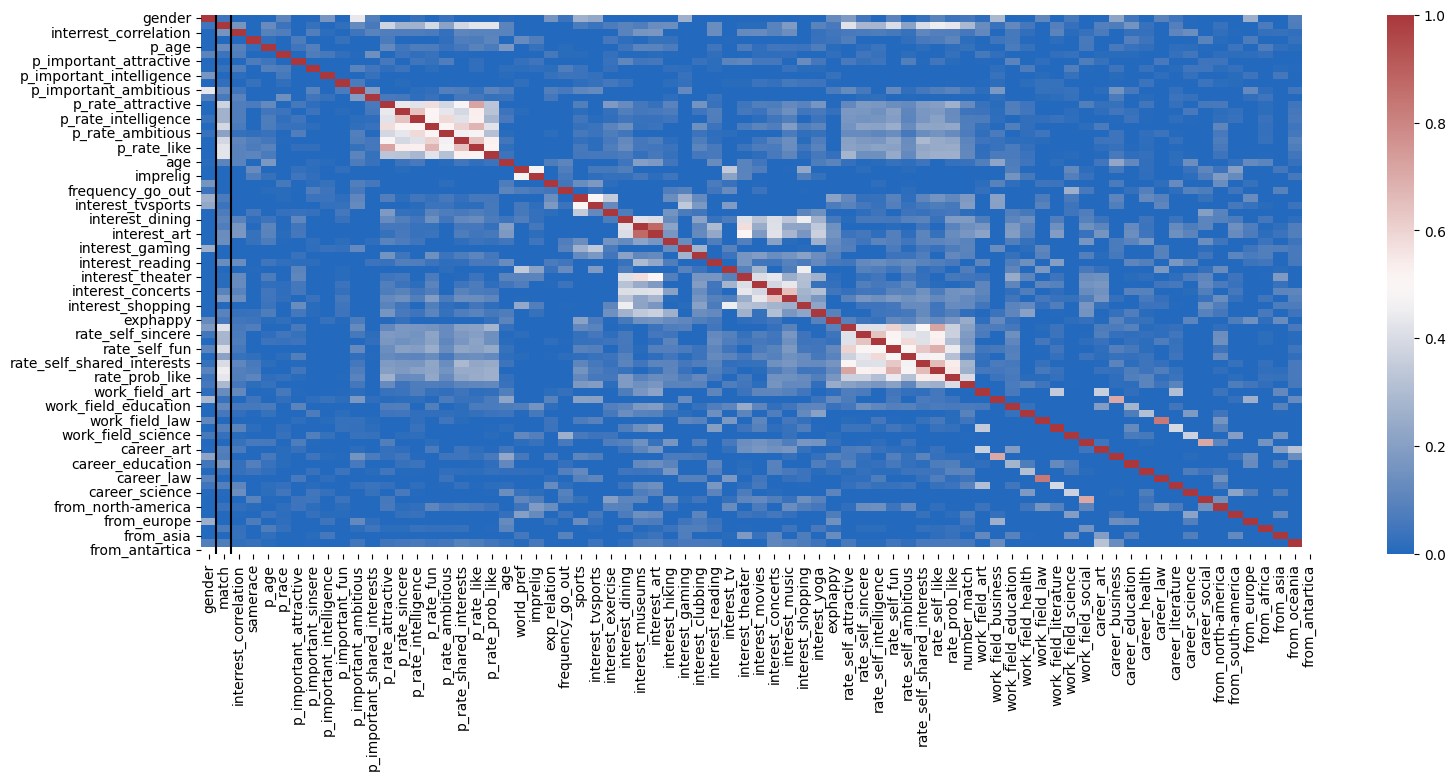

In [ ]:
to_drop = ["id_individual", "id_group", "p_id", "decision", "p_decision"]
df_corr = DATASET_SAMPLES.drop(columns=to_drop)
df_corr.sort_index(inplace=True)
df_corr = df_corr.corr()

# Visualization of the correlation matrix
plt.figure(figsize=(18, 7))
sns.heatmap(df_corr, cmap="vlag", vmin=0, vmax=1)
plt.axline((1, 0), (1, 1), color="black")
plt.axline((2, 0), (2, 1), color="black")
plt.show()


## III. Analyse des composantes principales (PCA)

### A. Visualize the variability of features

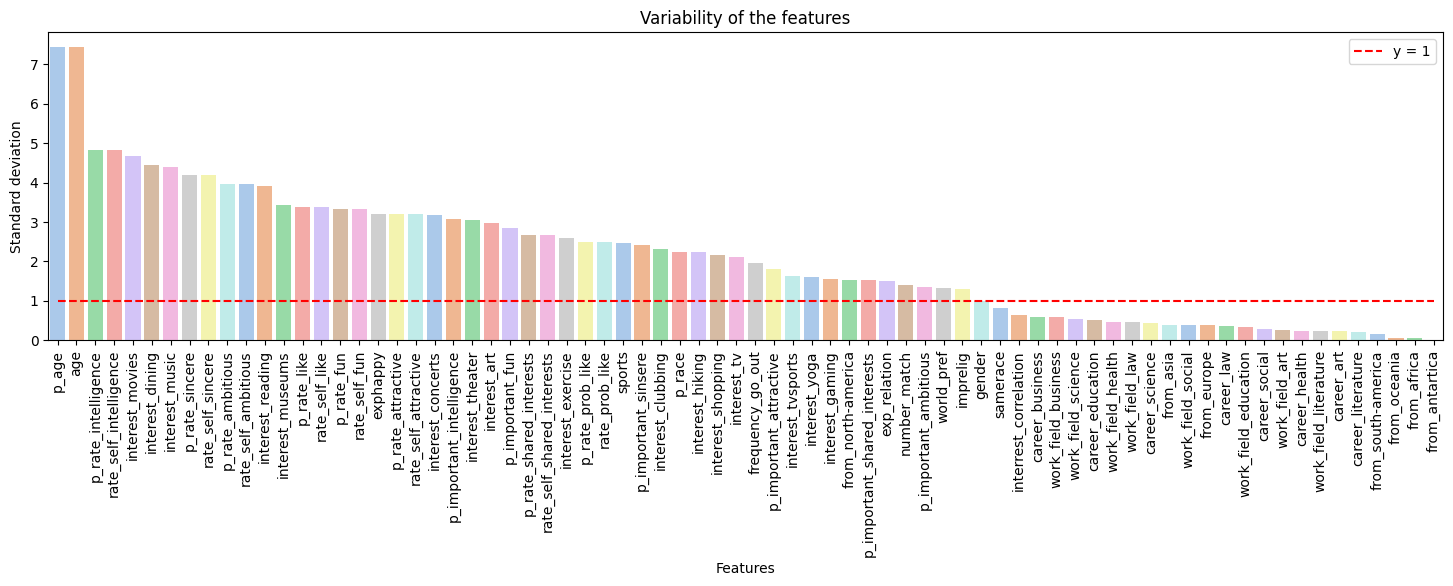

In [ ]:
# Visualise the variability of the features
df_std = DATASET.drop(columns=["id_individual", "id_group", "p_id", "decision", "p_decision", "match"])
df_std = df_std.mean() / df_std.std()
df_std = df_std.sort_values(ascending=False)

plt.figure(figsize=(18, 4))
plt.plot([1]*len(df_std), "r--", label="y = 1")
sns.barplot(x=df_std.keys(), orient="v", y=df_std.values, palette="pastel")
plt.xticks(rotation=90)
plt.title("Variability of the features")
plt.xlabel("Features")
plt.ylabel("Standard deviation")
plt.legend(loc="upper right")

plt.show()


### B. Visualised the explained variance of the principal components

In [ ]:
DATASET_RESCALED, _, _ = pp.load_preproc_dataset(ratio_test=0)
(X_RESCALED, Y_RESCALED) = pp.get_X_y(DATASET_RESCALED)

X_RESCALED.drop(columns=["p_id", "id_individual"], inplace=True)


The number of principal components is: 59


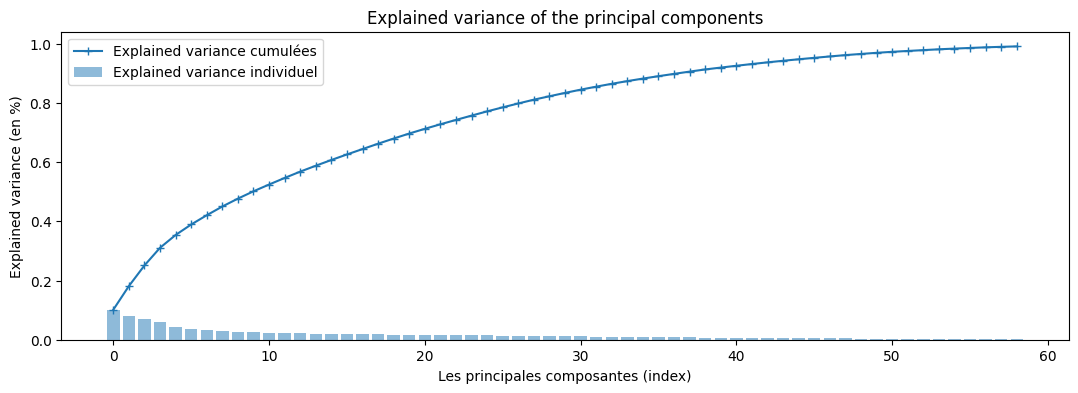

In [ ]:
# Application of the PCA
pca = PCA(n_components=.99)
pca_data = pca.fit_transform(X_RESCALED)
exp_var_pca = pca.explained_variance_ratio_  # type: ignore

print(f"The number of principal components is: {pca.n_components_}")

# Visualization of the explained variance of the principal components
x = range(0, len(exp_var_pca))
pca_cumulative_var = np.cumsum(exp_var_pca)

plt.figure(figsize=(13, 4))
plt.bar(x, height=exp_var_pca, label="Explained variance individuel", alpha=.5)
plt.plot(pca_cumulative_var, marker="+", label="Explained variance cumulées")
plt.xlabel("Les principales composantes (index)")
plt.ylabel("Explained variance (en %)")
plt.title("Explained variance of the principal components")
plt.legend()
plt.show()


### C. Scatter plot of principal componnent after PCA 

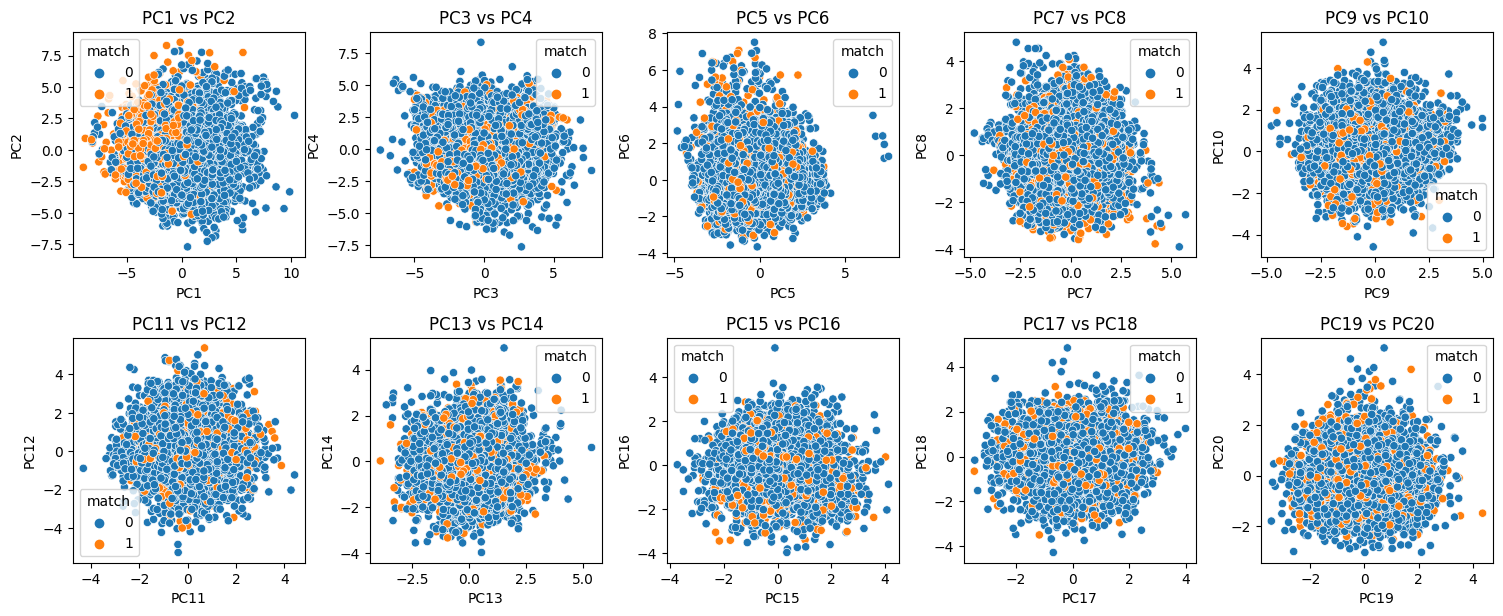

In [ ]:
# Dataframe of the principal components
labels = ["PC" + str(i) for i in range(1, len(exp_var_pca) + 1)]
DATASET_PCA = pd.DataFrame(pca_data, columns=labels, index=X_RESCALED.index)
DATASET_PCA["match"] = Y_RESCALED["match"]

# Visualization of the principal components
plt.figure(figsize=(15, 15))
img_i = 0

for i in range(1, 20, 2):
    img_i += 1
    plt.subplot(5, 5, img_i)
    plt.title(f"PC{i} vs PC{i + 1}")
    sns.scatterplot(data=DATASET_PCA, x=f"PC{i}", y=f"PC{i + 1}", hue="match")

plt.tight_layout()
plt.show()


### D. Scatter plot of principal components after applying PCA to the <b>balanced</b> data set.

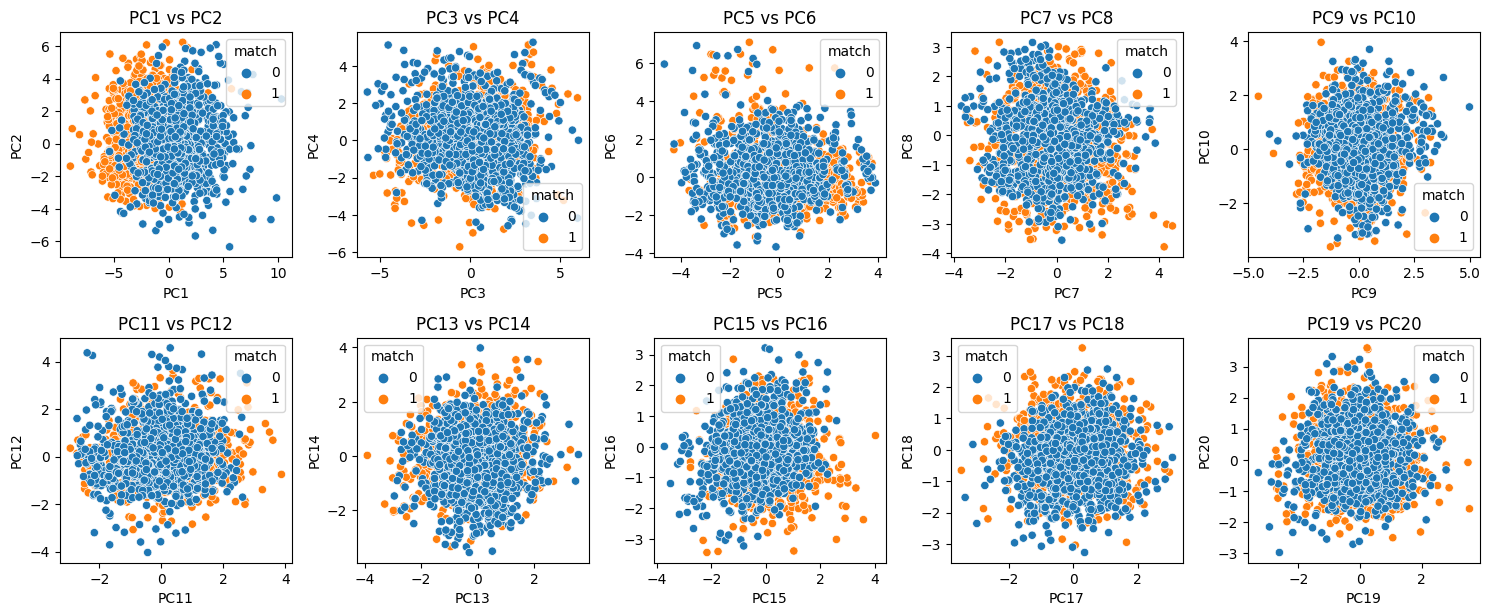

In [ ]:
samples = pp.get_samples_of_dataframe(DATASET_PCA, n_sample=1000)

# Visualization of the principal components
plt.figure(figsize=(15, 15))
img_i = 0

for i in range(1, 20, 2):
    img_i += 1
    plt.subplot(5, 5, img_i)
    plt.title(f"PC{i} vs PC{i + 1}")
    sns.scatterplot(data=samples, x=f"PC{i}", y=f"PC{i + 1}", hue="match")

plt.tight_layout()
plt.show()
